In [5]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [7]:
df = pd.read_csv('train.csv')


In [27]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [23]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [29]:
df[df.columns[2:]].iloc[5]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5, dtype: int64

In [31]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            4.1.0
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.1
anaconda-project                  0.11.1
anyio              

In [35]:
from tensorflow.keras.layers import TextVectorization

In [45]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [52]:
MAX_FEATURES = 200000 #number of words in the vocab

In [54]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800, #maximum length of that sentence 
                               output_mode='int') #map every single word to integer


In [65]:
vectorizer.adapt(X.values) #teach our vectorizer vocabulary

In [71]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275], dtype=int64)>

In [73]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [75]:
vectorized_text = vectorizer(X.values) #take every single value and vectorize it


In [81]:
len(X)

159571

In [77]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [85]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16) #each batch represented as 16 samples
dataset = dataset.prefetch(8) #helps bottlenecks

In [89]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [91]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) #skipping 70% and grabbing the 20%
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [97]:
train_generator = train.as_numpy_iterator()

In [107]:
train_generator.next()

(array([[    18,     13, 194391, ...,      0,      0,      0],
        [    51,     11,    193, ...,      0,      0,      0],
        [     8,     19,    551, ...,      0,      0,      0],
        ...,
        [  1949,     46,   1377, ...,      0,      0,      0],
        [199585,    397,     29, ...,      0,      0,      0],
        [    40,     16,   1252, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [113]:
model = Sequential()
#Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
#Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
#Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#final layer
model.add(Dense(6, activation='sigmoid'))

In [115]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [123]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 4828s 691ms/step - loss: 0.0461 - val_loss: 0.0410


In [124]:
history.history

{'loss': [0.046094439923763275], 'val_loss': [0.04102587327361107]}

In [125]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

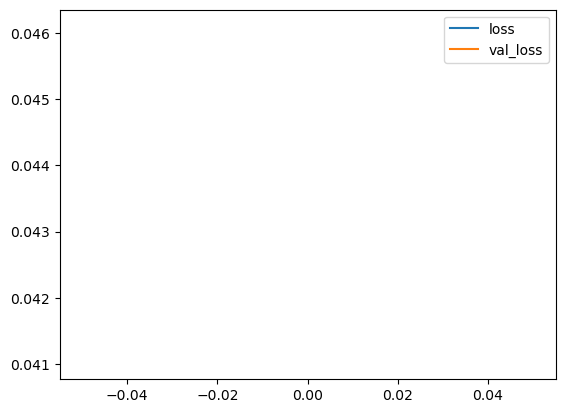

In [126]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [156]:
input_text = vectorizer('You freaking suck! I am going to hurt you')

In [158]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [160]:
batch = test.as_numpy_iterator().next()

In [161]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [162]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1]], dtype=int64)

In [163]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 218ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [165]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 65ms/step


array([[0.99316514, 0.37670237, 0.9344839 , 0.13188678, 0.83661664,
        0.22185698]], dtype=float32)

In [170]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [172]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    #unpack the batch
    X_true, y_true = batch
    # make a prediction
    yhat = model.predict(X_true)

    #flatten the prediction
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{pre.result().numpy()}')


In [1]:
!pip install gradio jinja2

  Using cached gradio-4.40.0-py3-none-any.whl.metadata (15 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached fastapi-0.112.0-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.4.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.2.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-0.24.5-py3-none-any.whl.metadata (13 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
     ---------------------------------------- 0.0/51.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     -------------------------------------- 51.6/51.6 kB 881.0 kB/s eta 0:00:00
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.9-py3-none-any.whl.metadata (2.5 kB)
  Using cached ruff-0.5.6-py3-none-win_amd64.whl.metadata (25 kB)
  Using cached semantic


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\harsh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
import gradio as gr

ModuleNotFoundError: No module named 'gradio'